In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [20]:
%config InlineBackend.figure_format = 'svg'

In [2]:
data_0_0 = pd.read_csv('/Users/jakubpazio/Imperial/Master Project/new-physics/new-physics/toy_data/flavio_tests/data/toy_data_c9_0.0_c10_0.0_2022_1_27_15.csv', index_col=0)
data_1_1 = pd.read_csv('/Users/jakubpazio/Imperial/Master Project/new-physics/new-physics/toy_data/flavio_tests/data/toy_data_c9_1.0_c10_1.0_2022_1_27_15.csv', index_col=0)
data_2_2 = pd.read_csv('/Users/jakubpazio/Imperial/Master Project/new-physics/new-physics/toy_data/flavio_tests/data/toy_data_c9_2.0_c10_2.0_2022_1_27_15.csv', index_col=0)
data_3_3 = pd.read_csv('/Users/jakubpazio/Imperial/Master Project/new-physics/new-physics/toy_data/flavio_tests/data/toy_data_c9_3.0_c10_3.0_2022_1_27_15.csv', index_col=0)
data_4_4 = pd.read_csv('/Users/jakubpazio/Imperial/Master Project/new-physics/new-physics/toy_data/flavio_tests/data/toy_data_c9_4.0_c10_4.0_2022_1_27_15.csv', index_col=0)

data_0_0['L'] = [0] * len(data_0_0)
data_1_1['L'] = [1] * len(data_1_1)
data_2_2['L'] = [2] * len(data_2_2)
data_3_3['L'] = [3] * len(data_3_3)
data_4_4['L'] = [4] * len(data_4_4)


In [3]:
df=pd.concat([data_0_0,data_1_1,data_2_2,data_3_3,data_4_4])

In [18]:
big_data00 = pd.read_csv('/Users/jakubpazio/Imperial/Master Project/new-physics/new-physics/toy_data/ML_Demo/data/toy_data_c9_0_c10_0_2021_10_29_11.csv', index_col=0)
log_likelihood_models = {}
for i, data in enumerate([data_1_1,data_2_2,data_3_3,data_4_4]):
    X = pd.concat([data_0_0,data])
    Y = X['L']
    X = X.drop(columns='L')
    mlp_clf = MLPClassifier()
    mlp_clf.fit(X, Y)

    log_likelihood = []
    for j in range(1000):
        sample = big_data00.sample(1000)
        log_probs = mlp_clf.predict_log_proba(sample)
        log_likelihood.append(sum(log_probs))
    
    log_likelihood_models[i] = np.array(log_likelihood)

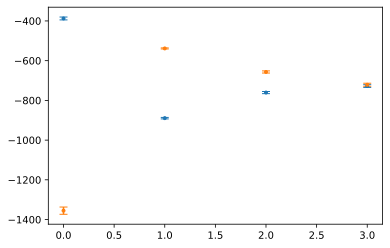

In [22]:
for k, arr in log_likelihood_models.items():
    mean_0 = arr[:, 0].mean()
    mean_1 = arr[:, 1].mean()
    std_0 = arr[:, 0].std()
    std_1 = arr[:, 1].std()

    plt.errorbar(k, mean_0, marker='.', yerr=std_0,c='tab:blue', capsize=4)
    plt.errorbar(k, mean_1, marker='.', yerr=std_1,c='tab:orange', capsize=4)
# plt.show()